In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
성적표xlsx = pd.read_excel("http://itpaper.co.kr/data/grade_card.xlsx", engine='openpyxl')
성적표xlsx

,이름,학년,성별,국어,영어,수학,과학
0,철수,1,남자,98,NaN,88.0,64.0
1,영희,2,여자,88,90.0,62.0,72.0
2,민수,1,남자,92,70.0,NaN,NaN
3,수현,3,여자,63,60.0,31.0,70.0
4,호영,4,남자,120,50.0,NaN,88.0


In [3]:
성적표 = 성적표xlsx.set_index("이름")
성적표

,학년,성별,국어,영어,수학,과학
이름,,,,,,
철수,1,남자,98,NaN,88.0,64.0
영희,2,여자,88,90.0,62.0,72.0
민수,1,남자,92,70.0,NaN,NaN
수현,3,여자,63,60.0,31.0,70.0
호영,4,남자,120,50.0,NaN,88.0


### 파이썬으로 결측치 소거

#### 결측치 확인

In [4]:
# 각데이터의 결측치 여부 확인

결측치여부 = 성적표.isna()
결측치여부

,학년,성별,국어,영어,수학,과학
이름,,,,,,
철수,False,False,False,True,False,False
영희,False,False,False,False,False,False
민수,False,False,False,False,True,True
수현,False,False,False,False,False,False
호영,False,False,False,False,True,False


In [5]:
# 각 열별로 결측치 수 파악
결측치합계 = 결측치여부.sum()
결측치합계

학년    0
성별    0
국어    0
영어    1
수학    2
과학    1
dtype: int64

#### 결측치 소거

In [6]:
# 결측치가 포함된 모든행 삭제
# 원본은 건들지않는게 제일 좋음
na1 = 성적표.dropna()
na1

,학년,성별,국어,영어,수학,과학
이름,,,,,,
영희,2,여자,88,90.0,62.0,72.0
수현,3,여자,63,60.0,31.0,70.0


In [7]:
# 특정 컬럼에있는 결측치만 제거
na2 = 성적표.dropna(subset=['수학'])
na2

,학년,성별,국어,영어,수학,과학
이름,,,,,,
철수,1,남자,98,NaN,88.0,64.0
영희,2,여자,88,90.0,62.0,72.0
수현,3,여자,63,60.0,31.0,70.0


In [8]:
# 행에 포함된 모든값이 결측치인 경우 삭제
na2 = 성적표.dropna(how='all')
na2

,학년,성별,국어,영어,수학,과학
이름,,,,,,
철수,1,남자,98,NaN,88.0,64.0
영희,2,여자,88,90.0,62.0,72.0
민수,1,남자,92,70.0,NaN,NaN
수현,3,여자,63,60.0,31.0,70.0
호영,4,남자,120,50.0,NaN,88.0


In [9]:
# 결측치가 포함된 모든 열 삭제

na3 = 성적표.dropna(axis=1)
na3

,학년,성별,국어
이름,,,
철수,1,남자,98
영희,2,여자,88
민수,1,남자,92
수현,3,여자,63
호영,4,남자,120


In [10]:
# 열에 포함된 모든 값이 결측치인 경우 삭제

na4 = 성적표.dropna(how='all', axis=1)
na4

,학년,성별,국어,영어,수학,과학
이름,,,,,,
철수,1,남자,98,NaN,88.0,64.0
영희,2,여자,88,90.0,62.0,72.0
민수,1,남자,92,70.0,NaN,NaN
수현,3,여자,63,60.0,31.0,70.0
호영,4,남자,120,50.0,NaN,88.0


#### 파이썬으로 결측치 대치하기

#### 결측치 대표값 대치

In [11]:
대표값_대치 = 성적표.fillna(value=50)
대표값_대치

,학년,성별,국어,영어,수학,과학
이름,,,,,,
철수,1,남자,98,50.0,88.0,64.0
영희,2,여자,88,90.0,62.0,72.0
민수,1,남자,92,70.0,50.0,50.0
수현,3,여자,63,60.0,31.0,70.0
호영,4,남자,120,50.0,50.0,88.0


#### 평균, 대치, 단순확률 대치

In [12]:
import pandas as pd
from sklearn.impute import SimpleImputer  # 통계기반 결측치 정제를 위한 클래스
import numpy as np

In [13]:
# 각 열단위로 평균(strategy='mean')을 결측치(missing_values)에 지정
정제규칙 = SimpleImputer(missing_values=np.nan, strategy='mean')
정제규칙

SimpleImputer()

In [14]:
# 결측치를 정제해야 하는 컬럼만 추출
정제대상 = 성적표.filter(['국어', '수학', '영어', '과학'])
정제대상

,국어,수학,영어,과학
이름,,,,
철수,98,88.0,NaN,64.0
영희,88,62.0,90.0,72.0
민수,92,NaN,70.0,NaN
수현,63,31.0,60.0,70.0
호영,120,NaN,50.0,88.0


In [15]:
# 정의된 규칙을 데이터프레임의 값들만 추출해서 적용
정제규칙_적용결과 = 정제규칙.fit_transform(정제대상.values)
print(type(정제규칙_적용결과))
정제규칙_적용결과

<class 'numpy.ndarray'>


array([[ 98.        ,  88.        ,  67.5       ,  64.        ],
       [ 88.        ,  62.        ,  90.        ,  72.        ],
       [ 92.        ,  60.33333333,  70.        ,  73.5       ],
       [ 63.        ,  31.        ,  60.        ,  70.        ],
       [120.        ,  60.33333333,  50.        ,  88.        ]])

In [16]:
# 적용된 규칙으로 새로운 데이터프레임 생성
결측치정제 = pd.DataFrame(정제규칙_적용결과, index=정제대상.index, columns=정제대상.columns)
결측치정제

,국어,수학,영어,과학
이름,,,,
철수,98.0,88.000000,67.5,64.0
영희,88.0,62.000000,90.0,72.0
민수,92.0,60.333333,70.0,73.5
수현,63.0,31.000000,60.0,70.0
호영,120.0,60.333333,50.0,88.0


In [17]:
# 정제과정에서 컬럼만 추출하기
tmp = 성적표.filter(['학년', '성별'])
tmp

,학년,성별
이름,,
철수,1,남자
영희,2,여자
민수,1,남자
수현,3,여자
호영,4,남자


In [18]:
# 추출된 컬럼과 정제결과를 병합하기

결측치완료 = pd.merge(tmp, 결측치정제, left_index=True, right_index=True)
결측치완료

,학년,성별,국어,수학,영어,과학
이름,,,,,,
철수,1,남자,98.0,88.000000,67.5,64.0
영희,2,여자,88.0,62.000000,90.0,72.0
민수,1,남자,92.0,60.333333,70.0,73.5
수현,3,여자,63.0,31.000000,60.0,70.0
호영,4,남자,120.0,60.333333,50.0,88.0


### 파이썬으로 이상치 정제

#### 이상치 존재 여부 확인

In [19]:
# 명목형 변수에 대한 요인화

결측치완료['학년'] = 결측치완료['학년'].astype('category')
결측치완료['성별'] = 결측치완료['성별'].astype('category')

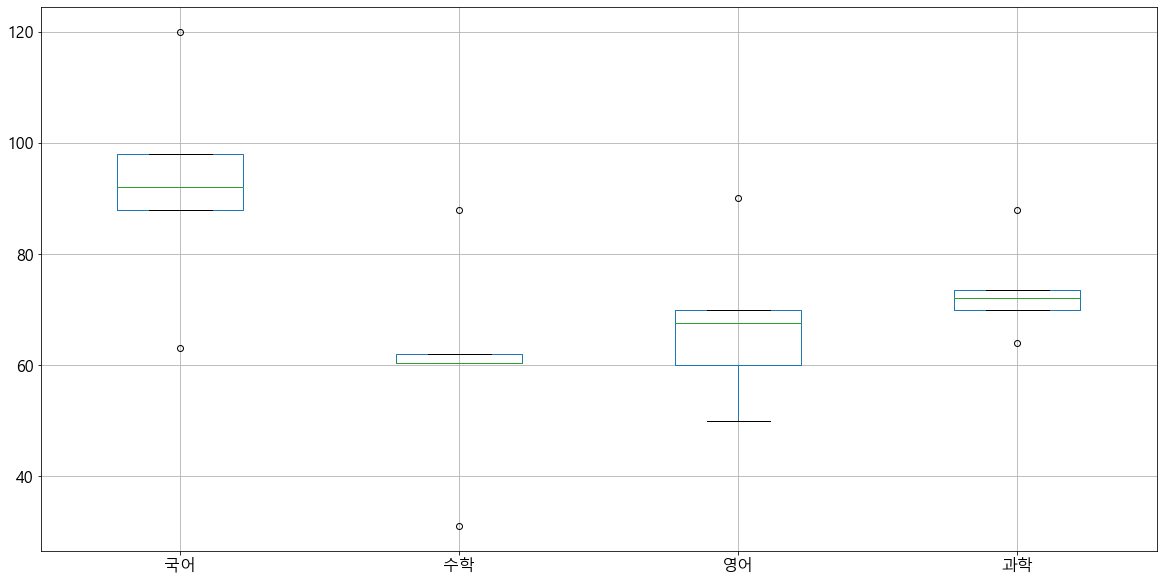

In [21]:
# 상자그림 표시하기

# 앞에서 1차적으로 정제한 결과를 활용해서 진행
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 16
plt.rcParams["figure.figsize"] = (20, 10)
결측치완료.boxplot()
plt.show()

#### 이상치를 결측치로 변경하기

In [22]:
# 국어점수에 대한 1, 3 사분위수 확인
q1 = 결측치완료['국어'].quantile(q=0.25)
q3 = 결측치완료['국어'].quantile(q=0.75)
print('1사분위 수 %f, 3사분위 수: %f' % (q1, q3))

1사분위 수 88.000000, 3사분위 수: 98.000000


In [23]:
# 국어의 위 극단취 경계값

q1 = 결측치완료['국어'].quantile(q=0.25)
q3 = 결측치완료['국어'].quantile(q=0.75)
print('1사분위 수 %f, 3사분위 수: %f' % (q1, q3))

1사분위 수 88.000000, 3사분위 수: 98.000000


In [29]:
# 국어점수의 위 극단치 경계값

top_limit = q3 + 1.5 * (q3-q1)
top_limit

113.0

In [28]:
# 국어점수에 대한 이상치 필터링

이상치데이터 = 결측치완료.query('국어 > @top_limit')
이상치데이터

,학년,성별,국어,수학,영어,과학
이름,,,,,,
호영,4,남자,120.0,60.333333,50.0,88.0


In [30]:
# 필터링 된 이상치 데이터에 대한 인덱스 추출

이상치인덱스 = list(이상치데이터.index)
이상치인덱스

['호영']

In [32]:
# 이상치를 갖는 인덱스에 대한 국어 점수를 결측치로 변경

for i in 이상치인덱스:
    결측치완료.loc[i, '국어'] = np.nan

결측치완료

,학년,성별,국어,수학,영어,과학
이름,,,,,,
철수,1,남자,98.0,88.000000,67.5,64.0
영희,2,여자,88.0,62.000000,90.0,72.0
민수,1,남자,92.0,60.333333,70.0,73.5
수현,3,여자,63.0,31.000000,60.0,70.0
호영,4,남자,NaN,60.333333,50.0,88.0


#### 변경된 결측치 정제

In [33]:
# 결측치를 정제할 규칙 정의

# 결측치에 대해 평균점수 부여
정제규칙 = SimpleImputer(missing_values=np.nan, strategy='mean')

In [34]:
# 결측치를 정제해야 하는 컬럼만 추출

정제대상 = 결측치완료.filter(['국어', '수학', '영어', '과학'])
정제대상

,국어,수학,영어,과학
이름,,,,
철수,98.0,88.000000,67.5,64.0
영희,88.0,62.000000,90.0,72.0
민수,92.0,60.333333,70.0,73.5
수현,63.0,31.000000,60.0,70.0
호영,NaN,60.333333,50.0,88.0


In [35]:
# DataFrame의 값에 대해 규칙 적용

정제규칙_적용결과 = 정제규칙.fit_transform(정제대상.values)
정제규칙_적용결과

array([[98.        , 88.        , 67.5       , 64.        ],
       [88.        , 62.        , 90.        , 72.        ],
       [92.        , 60.33333333, 70.        , 73.5       ],
       [63.        , 31.        , 60.        , 70.        ],
       [85.25      , 60.33333333, 50.        , 88.        ]])

In [37]:
# 적용된 규칙으로 새로운 데이터프레임 생성

이상치정제 = pd.DataFrame(정제규칙_적용결과, index=정제대상.index, columns=정제대상.columns)
이상치정제

,국어,수학,영어,과학
이름,,,,
철수,98.00,88.000000,67.5,64.0
영희,88.00,62.000000,90.0,72.0
민수,92.00,60.333333,70.0,73.5
수현,63.00,31.000000,60.0,70.0
호영,85.25,60.333333,50.0,88.0


In [38]:
# 정제과정에서 제외한 컬럼만 추출하기

tmp = 성적표.filter(['학년', '성별'])
tmp

,학년,성별
이름,,
철수,1,남자
영희,2,여자
민수,1,남자
수현,3,여자
호영,4,남자


In [40]:
# 추출된 컬럼과 정제결과를 병합하기

이상치완료 = pd.merge(tmp, 이상치정제, left_index=True, right_index=True)
이상치완료

,학년,성별,국어,수학,영어,과학
이름,,,,,,
철수,1,남자,98.00,88.000000,67.5,64.0
영희,2,여자,88.00,62.000000,90.0,72.0
민수,1,남자,92.00,60.333333,70.0,73.5
수현,3,여자,63.00,31.000000,60.0,70.0
호영,4,남자,85.25,60.333333,50.0,88.0
